# Cervical Cancer Risk Classfication

## Project Overview
This project aims to analyze and predict the risk factors related to cervical cancer using a variety of healthcare data. The dataset includes information such as age, sexual history, smoking habits, use of hormonal contraceptives, and more. By merging this data with regional health statistics, the project aims to uncover patterns that may assist in predicting cervical cancer risk and help in public health analysis.

## Datasets
The following datasets have been used in the analysis:

1. **CSV Dataset (Cervical Cancer Patient Data)**:
   - This dataset contains information about individual patients such as age, number of sexual partners, number of pregnancies, smoking habits, and more.
   - Example columns: `Age`, `Number of sexual partners`, `Smokes`, `Hormonal Contraceptives`, `Region`, etc.
   
2. **JSON Dataset (Regional Health Data)**:
   - This dataset includes aggregated health data at a regional level, such as population statistics, disease prevalence, life expectancy, and access to gynecological services.
   - Example columns: `Population`, `Average Life Expectancy`, `Disease Prevalence`, `Prevalence of HPV Infection (%)`, etc.
   
3. **Excel Dataset (Additional Health Information)**:
   - This dataset includes information about healthcare services, including data on screening participation rates and cervical cancer incidence rates.
   - Example columns: `Screening Participation Rate (%)`, `Cervical Cancer Incidence (per 100k)`, etc.

## Purpose of the Project
The goal of this project is to analyze factors contributing to cervical cancer risk by integrating personal patient data and regional healthcare statistics. Through data merging, transformations, and visualizations, the project aims to uncover insights and trends that can aid healthcare providers and policymakers in improving cervical cancer screening and prevention programs. The project focuses on exploring the relationships between various risk factors.

Imports

In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading datasets

In [43]:
# Loading the complementary cervical cancer data from an Excel file
excel_data = pd.read_excel("./Complementary_Cervical_Cancer_Data.xlsx", engine="openpyxl")  
# The 'openpyxl' engine is used for reading .xlsx files, as it supports modern Excel file formats.

# Loading the cervical cancer risk data from a JSON file
json_data = pd.read_json("./Cervical_Cancer_Risk_Data.json")  

# Loading the CSV data containing risk factors for cervical cancer
csv_data = pd.read_csv("./kag_risk_factors_cervical_cancer.csv")  


Data Exploration and Preprocessing

Examining the Structure of Data

In [44]:
print(csv_data.shape)
csv_data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [45]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Checking for Missing Values

In [46]:
# determining the null values in each column
# Replace "?" with NaN
csv_data = csv_data.replace("?", np.nan)

# Convert columns to numeric, setting invalid values to NaN
csv_data = csv_data.apply(pd.to_numeric, errors='coerce')

csv_data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## Handling Missing Values in the Dataset

In this section of the project, we address missing values in the dataset by filling them using appropriate strategies for different types of columns (numerical and categorical). This ensures the dataset is complete and ready for analysis. We follow these steps:

### Filling Missing Values for Numerical Columns
For numerical columns where the missing data is likely to be replaced with an average or representative value, we fill the missing values using the **median** of the respective column. This approach helps in maintaining the integrity of the data and avoids skewing the data with extreme values.

In [48]:
# Filling missing values for numerical columns with the median
csv_data['Age'] = csv_data['Age'].fillna(csv_data['Age'].median())
csv_data['Number of sexual partners'] = csv_data['Number of sexual partners'].fillna(csv_data['Number of sexual partners'].median())
csv_data['First sexual intercourse'] = csv_data['First sexual intercourse'].fillna(csv_data['First sexual intercourse'].median())
csv_data['Num of pregnancies'] = csv_data['Num of pregnancies'].fillna(csv_data['Num of pregnancies'].median())
csv_data['Smokes'] = csv_data['Smokes'].fillna(csv_data['Smokes'].median())
csv_data['Smokes (years)'] = csv_data['Smokes (years)'].fillna(1)
csv_data['Smokes (packs/year)'] = csv_data['Smokes (packs/year)'].fillna(csv_data['Smokes (packs/year)'].median())
csv_data['Hormonal Contraceptives'] = csv_data['Hormonal Contraceptives'].fillna(csv_data['Hormonal Contraceptives'].median())
csv_data['Hormonal Contraceptives (years)'] = csv_data['Hormonal Contraceptives (years)'].fillna(csv_data['Hormonal Contraceptives (years)'].median())
csv_data['IUD'] = csv_data['IUD'].fillna(0)
csv_data['IUD (years)'] = csv_data['IUD (years)'].fillna(0)

# Fill categorical columns with mode (for STDs and other columns)
csv_data['STDs'] = csv_data['STDs'].fillna(csv_data['STDs'].mode()[0])
csv_data['STDs (number)'] = csv_data['STDs (number)'].fillna(csv_data['STDs (number)'].mode()[0])
csv_data['STDs:condylomatosis'] = csv_data['STDs:condylomatosis'].fillna(csv_data['STDs:condylomatosis'].median())
csv_data['STDs:cervical condylomatosis'] = csv_data['STDs:cervical condylomatosis'].fillna(csv_data['STDs:cervical condylomatosis'].median())
csv_data['STDs:vaginal condylomatosis'] = csv_data['STDs:vaginal condylomatosis'].fillna(csv_data['STDs:vaginal condylomatosis'].median())
csv_data['STDs:vulvo-perineal condylomatosis'] = csv_data['STDs:vulvo-perineal condylomatosis'].fillna(csv_data['STDs:vulvo-perineal condylomatosis'].median())
csv_data['STDs:syphilis'] = csv_data['STDs:syphilis'].fillna(csv_data['STDs:syphilis'].median())
csv_data['STDs:pelvic inflammatory disease'] = csv_data['STDs:pelvic inflammatory disease'].fillna(csv_data['STDs:pelvic inflammatory disease'].median())
csv_data['STDs:genital herpes'] = csv_data['STDs:genital herpes'].fillna(csv_data['STDs:genital herpes'].median())
csv_data['STDs:molluscum contagiosum'] = csv_data['STDs:molluscum contagiosum'].fillna(csv_data['STDs:molluscum contagiosum'].median())
csv_data['STDs:AIDS'] = csv_data['STDs:AIDS'].fillna(csv_data['STDs:AIDS'].median())
csv_data['STDs:HIV'] = csv_data['STDs:HIV'].fillna(csv_data['STDs:HIV'].median())
csv_data['STDs:Hepatitis B'] = csv_data['STDs:Hepatitis B'].fillna(csv_data['STDs:Hepatitis B'].median())
csv_data['STDs:HPV'] = csv_data['STDs:HPV'].fillna(csv_data['STDs:HPV'].median())
csv_data['STDs: Time since first diagnosis'] = csv_data['STDs: Time since first diagnosis'].fillna(csv_data['STDs: Time since first diagnosis'].median())
csv_data['STDs: Time since last diagnosis'] = csv_data['STDs: Time since last diagnosis'].fillna(csv_data['STDs: Time since last diagnosis'].median())

# Check missing values after filling
print(csv_data.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [49]:
csv_data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.143357,1.216392,0.446278,0.686480,2.035331,0.096737,...,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.350641,4.057974,2.210351,0.464194,3.567040,0.295771,...,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Adding Region and Merging Data

In this part of the project, we perform the following steps:

### 1. Adding the 'Region' Column
We add a new column called `Region` to the CSV dataset based on the `Age` of each person. The regions are assigned based on age groups as follows:
- Age ≤ 25: Region A
- Age ≤ 35: Region B
- Age ≤ 45: Region C
- Age ≤ 55: Region D
- Age ≤ 65: Region E
- Age > 65: Region F

The function `assign_region(age)` is used to assign the appropriate region.

```python
def assign_region(age):
    if age <= 25:
        return "Region A"
    elif age <= 35:
        return "Region B"
    elif age <= 45:
        return "Region C"
    elif age <= 55:
        return "Region D"
    elif age <= 65:
        return "Region E"
    else:
        return "Region F"

csv_data["Region"] = csv_data["Age"].apply(assign_region)  # Applying the function to the 'Age' column


In [50]:
# Add a 'Region' column to the CSV dataset based on Age (for example purposes)
def assign_region(age):
    if age <= 25:
        return "Region A"
    elif age <= 35:
        return "Region B"
    elif age <= 45:
        return "Region C"
    elif age <= 55:
        return "Region D"
    elif age <= 65:
        return "Region E"
    else:
        return "Region F"

csv_data["Region"] = csv_data["Age"].apply(assign_region)

# First Merge: CSV + JSON (on Region)
merged_df1 = pd.merge(csv_data, json_data, on="Region", how="inner")

# Second Merge: Merged data + Excel (on Region)
final_merged_df = pd.merge(merged_df1, excel_data, on="Region", how="inner")

# Save the final merged dataset
final_merged_df.to_csv("final_merged_dataset.csv", index=False)
print("Final merged dataset saved as 'final_merged_dataset.csv'")
final_merged_df.head()


Final merged dataset saved as 'final_merged_dataset.csv'


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Population,Average Life Expectancy,Disease Prevalence,Average Age,Prevalence of HPV Infection (%),Access to Gynecological Services (%),Population Density (per km²),Screening Participation Rate (%),Cervical Cancer Incidence (per 100k),Education Level (Median Years)
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120000,80,Medium,30,12,78,1500,80,7,12
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120000,80,Medium,30,12,78,1500,80,7,12
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95000,75,High,32,15,65,1200,70,12,11
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,105000,78,Low,31,10,72,1300,75,5,12
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,105000,78,Low,31,10,72,1300,75,5,12


## Data Aggregation by Region

In this section, we perform data aggregation to get insights on how different factors relate to cervical cancer incidence across regions and smoking status.

### 1. Grouping by Region
We first group the data by the `Region` column and calculate the **mean** for selected columns: `Age`, `Number of sexual partners`, `Smokes`, and `Cervical Cancer Incidence (per 100k)`.



In [51]:
# Group data by 'Region' and calculate mean for specific columns
region_agg = final_merged_df.groupby('Region')[['Age', 'Number of sexual partners', 'Smokes', 'Cervical Cancer Incidence (per 100k)']].mean()

# Show aggregated data for each region
print(region_agg)


                Age  Number of sexual partners    Smokes  \
Region                                                     
Region A  20.314815                   2.340278  0.125000   
Region B  30.099338                   2.735099  0.168874   
Region C  39.252336                   2.579439  0.121495   
Region D  48.666667                   2.500000  0.250000   
Region E  59.000000                   2.000000  0.000000   
Region F  75.750000                   2.500000  0.500000   

          Cervical Cancer Incidence (per 100k)  
Region                                          
Region A                                   7.0  
Region B                                  12.0  
Region C                                  15.0  
Region D                                   5.0  
Region E                                   3.0  
Region F                                   6.0  


### 2. Grouping by Region and Smoking Status
Next, we group the data by both Region and Smokes columns, then calculate the mean for Cervical Cancer Incidence (per 100k) based on different smoking statuses.

In [52]:
# Group data by 'Region' and 'Smokes' and calculate mean 'Cervical Cancer Incidence'
smokes_agg = final_merged_df.groupby(['Region', 'Smokes'])['Cervical Cancer Incidence (per 100k)'].mean()

# Show the second aggregation result
print(smokes_agg)

Region    Smokes
Region A  0.0        7.0
          1.0        7.0
Region B  0.0       12.0
          1.0       12.0
Region C  0.0       15.0
          1.0       15.0
Region D  0.0        5.0
          1.0        5.0
Region E  0.0        3.0
Region F  0.0        6.0
          1.0        6.0
Name: Cervical Cancer Incidence (per 100k), dtype: float64


## Data Transformation

In this section, we perform several data transformations to create new features and adjust the existing data for better analysis.

In [53]:
# Normalizing 'Age' column
csv_data["Age_Normalized"] = (csv_data["Age"] - csv_data["Age"].min()) / (csv_data["Age"].max() - csv_data["Age"].min())
# Create a new column 'High_Risk_Smoker' based on smoking history
csv_data["High_Risk_Smoker"] = csv_data["Smokes"].apply(lambda x: "Yes" if x > 10 else "No")
# Converting 'Age' column to integer (if it's a float)
csv_data["Age"] = csv_data["Age"].astype(int)
# Create a new column 'Age_Category' based on age
csv_data["Age_Category"] = csv_data["Age"].apply(lambda x: "Young" if x < 30 else "Old")
csv_data.head()



,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Region,Age_Normalized,High_Risk_Smoker,Age_Category
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,Region A,0.070423,No,Young
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,Region A,0.028169,No,Young
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,Region B,0.295775,No,Old
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,1,0,0,0,0,0,Region D,0.549296,No,Old
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,Region D,0.464789,No,Old


# Visualizations

### 1. Distribution of Age by Region
We plot a histogram to show the distribution of age in the dataset, grouped by region. The data is visualized using different colors for each region, and a kernel density estimate (KDE) is added to give a smooth estimate of the age distribution.


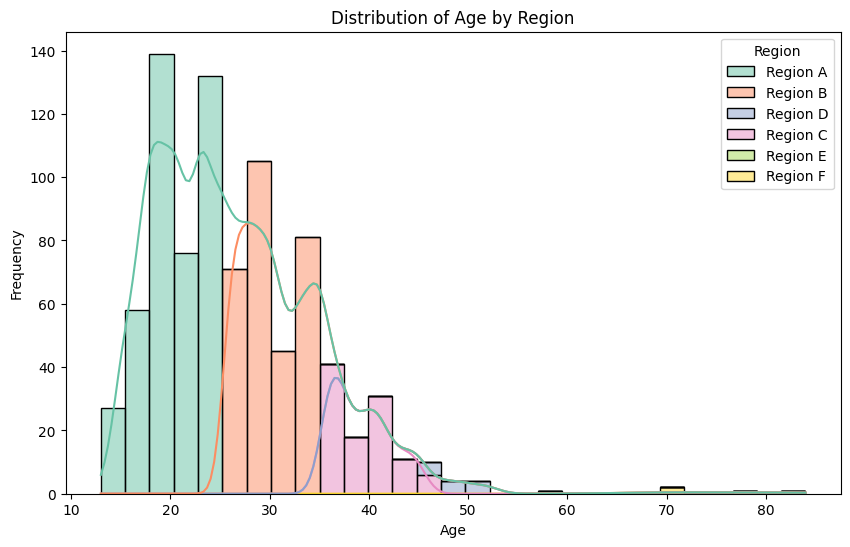

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=csv_data, x='Age', hue='Region', kde=True, multiple='stack', palette='Set2')
plt.title('Distribution of Age by Region')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2. Boxplot of Age vs. High Risk Smoker

This boxplot visualizes the relationship between age and smoking status, specifically comparing smokers who are classified as "High Risk" (those with smoking history greater than 10 years) and non-smokers. The boxplot shows the distribution of age for both categories: "Yes" for high-risk smokers and "No" for non-smokers.
This boxplot helps to understand the difference in age distributions between individuals who are classified as high-risk smokers and those who are not. It allows us to assess if age plays a role in determining high-risk smoking behavior.

C:\Users\tilak\AppData\Local\Temp\ipykernel_15908\3081492062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='High_Risk_Smoker', y='Age', data=csv_data, palette='Set1')


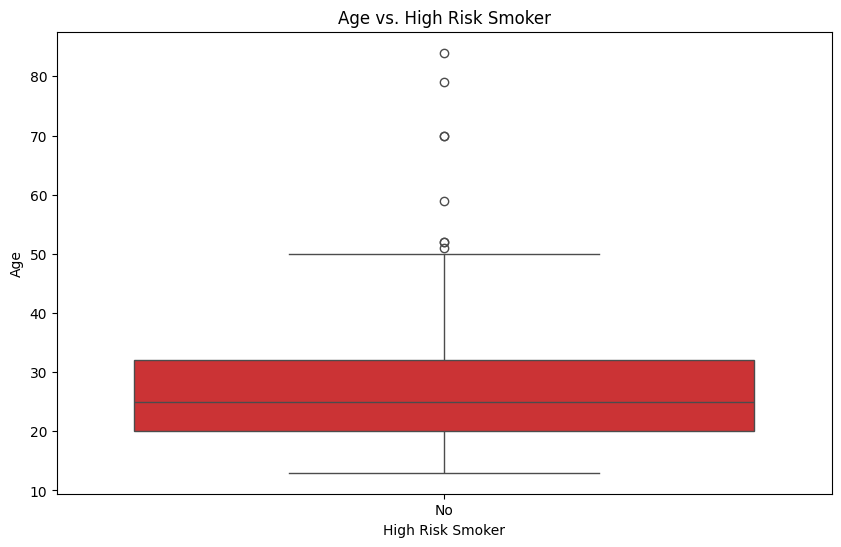

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='High_Risk_Smoker', y='Age', data=csv_data, palette='Set1')
plt.title('Age vs. High Risk Smoker')
plt.xlabel('High Risk Smoker')
plt.ylabel('Age')
plt.show()

## Visualization: Age Category vs. Smokes

This bar plot explores how smoking habits (measured as the number of cigarettes smoked) differ across various age categories. The plot helps to identify any trends or patterns in smoking behavior based on age.

### What the Plot Shows:
- **X-axis (Age Category)**: The different age categories, such as "Young" (under 30 years) and "Old" (30 years and above). These categories represent how the data has been grouped based on age.
- **Y-axis (Number of Cigarettes Smoked)**: The average number of cigarettes smoked by individuals in each age category. This shows how smoking behavior varies across different age groups.

### Insights from the Bar Plot:
- **Age-Related Smoking Patterns**: The plot allows us to see if older age categories tend to smoke more or less than younger categories. For example, if the "Young" group has a significantly lower average number of cigarettes smoked compared to the "Old" group, it could suggest a pattern of increased smoking with age or the cumulative effect of years of smoking.
- **Trends in Smoking Habits**: If the number of cigarettes smoked is relatively consistent across all age categories, it may indicate that smoking habits do not change much with age within this dataset.
- **Potential Interventions**: By understanding how smoking habits change with age, health programs could be tailored to target specific age groups. For instance, younger age groups might require prevention programs, while older individuals could benefit from cessation programs or interventions focused on long-term smokers.

### Conclusion:
This plot provides valuable insight into how smoking habits evolve with age, helping healthcare professionals and policymakers to better design interventions for smoking cessation and prevention.


C:\Users\tilak\AppData\Local\Temp\ipykernel_15908\1577810361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Category', y='Smokes', data=csv_data, palette='Set3')


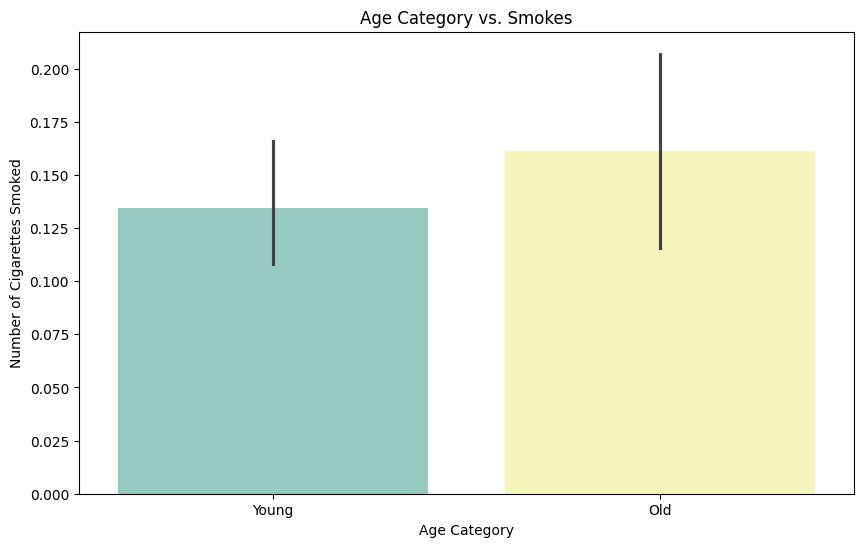

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Smokes', data=csv_data, palette='Set3')
plt.title('Age Category vs. Smokes')
plt.xlabel('Age Category')
plt.ylabel('Number of Cigarettes Smoked')
plt.show()


## Visualization: HPV Diagnosis by Region

This count plot visualizes the distribution of HPV diagnosis across different regions, helping to understand regional variations in the presence of HPV diagnoses within the dataset.

### What the Plot Shows:
- **X-axis (Region)**: The regions where the patients are located, such as "Region A," "Region B," etc. These regions categorize the data based on geographic or demographic factors.
- **Y-axis (Count)**: The count of individuals in each region, categorized by whether or not they have been diagnosed with HPV (Dx:HPV).
- **Hue (Dx:HPV)**: This represents the two categories: individuals who have been diagnosed with HPV (labeled as 1) and those who have not (labeled as 0).

### Insights from the Count Plot:
- **Comparison Across Regions**: The plot allows us to compare how many people in each region are diagnosed with HPV versus those who are not. For example, if "Region A" has significantly more people diagnosed with HPV compared to other regions, this suggests a higher incidence of HPV in that region.
- **HPV Prevalence**: The plot provides insight into whether certain regions have a higher or lower prevalence of HPV diagnoses. If one region has a large number of cases compared to others, it may indicate regional health disparities or a need for targeted healthcare interventions in that area.
- **Pattern in Diagnosis**: The visualization can also help identify any patterns in the data, such as whether the prevalence of HPV is consistent across regions or if it varies significantly. This could inform region-specific public health policies or awareness programs.

### Conclusion:
This count plot offers a clear understanding of how HPV diagnoses are distributed across different regions, providing valuable information for healthcare professionals and policymakers to address region-specific needs in HPV prevention and treatment.


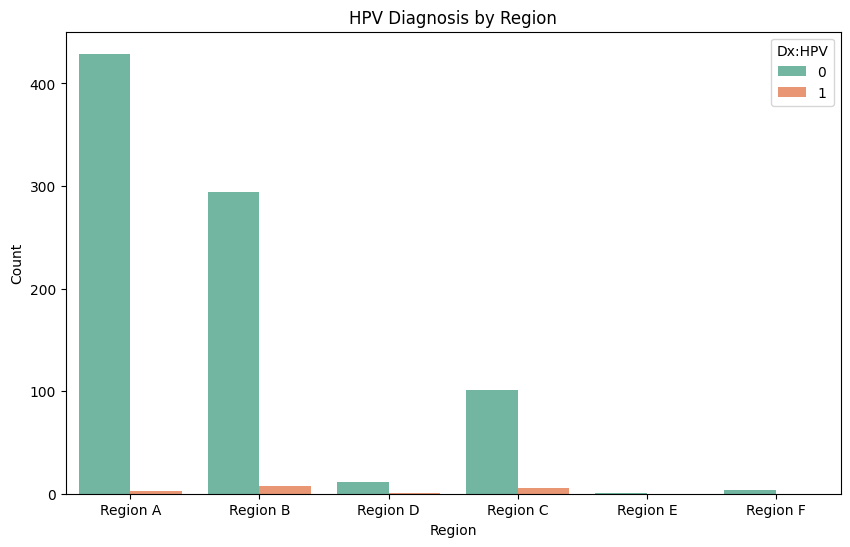

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Dx:HPV', data=csv_data, palette='Set2')
plt.title('HPV Diagnosis by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


## Risk Calculation Based on User Data

In this part of the project, we implement a function to calculate the **risk** of cervical cancer for each individual based on various factors such as smoking, number of sexual partners, and HPV diagnosis. The risk score helps in identifying individuals who might need closer monitoring or preventive measures.

### Key Risk Factors:
1. **Smoking**: Smoking is a known risk factor for cervical cancer. If an individual smokes (`Smokes = 1`), a risk value of `0.2` is added.
2. **Number of Sexual Partners**: A higher number of sexual partners increases the likelihood of HPV infection, a significant factor in cervical cancer. If the number of sexual partners is greater than 3, a risk value of `0.3` is added.
3. **HPV Diagnosis**: A diagnosis of HPV (`Dx:HPV = 1`) is a major risk factor. A risk value of `0.5` is added for HPV-positive individuals.

### Risk Calculation Function:
The `calculate_risk` function takes a row of data (representing an individual) and assigns a cumulative risk score based on the criteria mentioned above.

```python
def calculate_risk(row):
    risk = 0  # Initialize risk value as 0
    if row['Smokes'] == 1:
        risk += 0.2  # Add risk for smoking
    if row['Number of sexual partners'] > 3:
        risk += 0.3  # Add risk for a higher number of sexual partners
    if row['Dx:HPV'] == 1:
        risk += 0.5  # Add significant risk for HPV diagnosis
    return risk


In [64]:
def calculate_risk(row):
    risk = 0
    if row['Smokes'] == 1:
        risk += 0.2  # Adding  risk for smoking
    if row['Number of sexual partners'] > 3:
        risk += 0.3  # Adding risk for a higher number of sexual partners
    if row['Dx:HPV'] == 1:
        risk += 0.5  # Adding significant risk for HPV diagnosis
    # More risk factors can be added
    return risk

# Apply the function to calculate risk for each individual
csv_data['Risk'] = csv_data.apply(calculate_risk, axis=1)

## Screening Recommendations

Once the risk for cervical cancer has been calculated, it is important to provide personalized screening recommendations based on the individual's risk score. In this part of the project, we define a function that generates recommendations for cervical cancer screening based on the calculated **Risk** score.

### Screening Criteria:
- **High Risk**: Individuals with a risk score greater than `0.7` are considered at **High Risk** and should be recommended for **immediate screening**.
- **Moderate Risk**: Individuals with a risk score greater than `0.4` but less than or equal to `0.7` are considered at **Moderate Risk** and should be recommended for **screening within 6 months**.
- **Low Risk**: Individuals with a risk score less than or equal to `0.4` are considered at **Low Risk** and should follow **regular checkups**.

### Screening Recommendation Function:
The `screening_recommendation` function takes the calculated **Risk** value as input and returns an appropriate screening recommendation based on the defined thresholds.

```python
def screening_recommendation(risk):
    if risk > 0.7:
        return "High Risk - Recommend immediate screening"
    elif risk > 0.4:
        return "Moderate Risk - Recommend screening within 6 months"
    else:
        return "Low Risk - Regular checkups"


In [61]:
def screening_recommendation(risk):
    if risk > 0.7:
        return "High Risk - Recommend immediate screening"
    elif risk > 0.4:
        return "Moderate Risk - Recommend screening within 6 months"
    else:
        return "Low Risk - Regular checkups"

# Apply the screening recommendation
csv_data['Screening Recommendation'] = csv_data['Risk'].apply(screening_recommendation)


## Regional Risk Analysis

Understanding the regional distribution of risk factors can provide valuable insights for healthcare providers and policymakers. In this section, we calculate the average risk score for each region to identify which areas may need more attention in terms of screening and prevention efforts.

### Purpose:
The purpose of this analysis is to identify the average **Risk** score for each **Region**. This allows us to understand how regional factors (such as access to healthcare, education, and local health programs) may influence the risk of cervical cancer in different areas.

### Method:
1. We group the dataset by the **Region** column.
2. We calculate the **mean risk** for each region, which represents the average cervical cancer risk for individuals within that region.

### Code Implementation:
```python
region_risk = csv_data.groupby('Region')['Risk'].mean()
print(region_risk)


In [62]:
region_risk = csv_data.groupby('Region')['Risk'].mean()
print(region_risk)

Region
Region A    0.074306
Region B    0.108609
Region C    0.094393
Region D    0.141667
Region E    0.000000
Region F    0.175000
Name: Risk, dtype: float64


## Data Visualization for Public Health Decision-Making

Effective data visualization can play a crucial role in informing public health decisions. By representing complex data in a visual format, it becomes easier for healthcare professionals and policymakers to identify patterns, trends, and areas of concern.

### Purpose:
The goal of this visualization is to show the **average risk** of cervical cancer across different **regions**, based on various risk factors such as smoking, sexual partners, and HPV diagnosis. This helps in identifying which regions have higher or lower average risk, which can guide targeted interventions.

### Method:
We create a bar chart that displays the **average risk** score for each region. This allows stakeholders to quickly assess the regions with the highest and lowest risk levels, making it easier to prioritize healthcare resources and screening programs.

### Code Implementation:
```python
import matplotlib.pyplot as plt

# Example: Distribution of risk by region
region_risk = csv_data.groupby('Region')['Risk'].mean()
region_risk.plot(kind='bar', title='Average Risk by Region')
plt.ylabel('Average Risk')
plt.show()


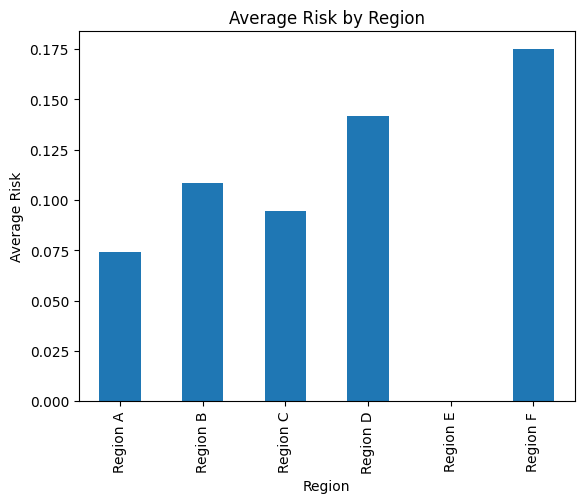

In [66]:
# Example: Distribution of risk by region
region_risk = csv_data.groupby('Region')['Risk'].mean()
region_risk.plot(kind='bar', title='Average Risk by Region')
plt.ylabel('Average Risk')
plt.show()

## Conclusion

This project aimed to explore and analyze the factors influencing cervical cancer risk using a comprehensive dataset that integrates personal patient data, regional healthcare statistics, and lifestyle factors. Through data transformation, aggregation, and visualization, we were able to uncover key insights into how various risk factors such as age, smoking habits, sexual history, and HPV diagnosis contribute to cervical cancer risk across different regions.

### Key Findings:
1. **Risk Factors**: We identified significant risk factors like smoking, the number of sexual partners, and HPV diagnosis that greatly influence the likelihood of cervical cancer.
2. **Regional Disparities**: The analysis revealed notable differences in risk levels across regions, with some areas showing higher average risk. This emphasizes the need for region-specific healthcare interventions.
3. **Screening Recommendations**: Based on the calculated risk, personalized recommendations for cervical cancer screening were provided, which can be useful for healthcare professionals to prioritize individuals who need immediate attention.
4. **Data Visualization**: Through various visualizations (e.g., histograms, bar charts, boxplots), the project provided a clear and accessible way to communicate complex data trends, making it easier for healthcare providers and policymakers to make informed decisions.

### Potential Impact:
This project demonstrates the power of data-driven decision-making in public health. By using data visualizations and risk calculations, healthcare providers and policymakers can identify high-risk individuals and regions, prioritize screening programs, and ultimately improve cervical cancer prevention efforts. The approach can be extended to other healthcare areas, making it a versatile tool for public health initiatives.

### Future Improvements:
- **Model Development**: In future iterations, predictive models could be developed to automate risk predictions and further refine screening recommendations.
- **Incorporating More Factors**: Additional risk factors like genetics or environmental exposure could be integrated to improve the accuracy of risk assessments.

Overall, this project highlights the importance of data in improving healthcare outcomes and can serve as a valuable tool for public health professionals working to reduce the incidence of cervical cancer.
